## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [9]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [10]:
halos= pipeline.halos
print(halos)

        z                 mass           first_moment   
------------------ ------------------ ------------------
3.6537830978959676 1455563212794.7747 1615268476927.9463
 4.608754019441936  1007252307225.905 1510210219543.5208
3.4763852899303846 1253722368092.6152 1637569098519.2505
2.8399799890421686  1134152696007.464 1725119002456.5488
 0.923336100270448 13708704586792.176 2050910296076.5896
3.7242273302995255  7925664391486.896 1606717279308.9094
 4.939146769238276 1362300784521.1687 1479103646114.7754
3.4326634269015557 1117155752082.7139 1643175082057.2832
 4.176638806881885  2638899281402.858 1554800733168.6235
 1.261720358931454  1944137985512.518 1990237751060.4636
               ...                ...                ...
2.2916822433460733  2125535608264.552  1810390548747.664
1.0176175129414238 1939953575920.6582 2034148719918.3977
 3.496095268457344  1052523795957.747 1635045765196.5305
 2.953371602969405  2456515230664.653 1708611778790.7458
1.9158365322160593  19006183566

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [11]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 10000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

area [0.06730412 0.05531041 0.06981869 0.07934603 0.07980604 0.06632884
 0.05177458 0.07045059 0.06040525 0.09034718 0.0562678  0.08539464
 0.09244557 0.08736504 0.08380104 0.06953535 0.07761619 0.09158712
 0.05927604 0.07916585 0.07375093 0.05436288 0.06000757 0.08848637] Mpc2
epsilon_crit [4185204895489613.0, 6186884482466000.0, 3892323177675137.0, 2998679445990292.0, 1532448316266544.8, 4307460232680104.5, 7092298989470048.0, 3823301771225308.0, 5182240593534116.0, 1643388010883948.2, 5974769725595399.0, 2540090993509386.5, 1971478893829141.2, 2397247907564360.5, 1552739716769144.8, 3923838360168264.0, 3141449793320158.0, 2064397713658291.8, 5380761547641805.0, 1530424856838124.5, 3488402873223433.5, 1597386089337705.2, 5250789202232843.0, 1604353730584174.2]
first_moment/area [2.39995482e+13 2.73042654e+13 2.34545936e+13 2.17417169e+13
 2.56986866e+13 2.42235083e+13 2.85681426e+13 2.33237956e+13
 2.57394960e+13 2.20287753e+13 2.69889463e+13 2.09302388e+13
 2.04939554e+13 2.07221396

### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [12]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this Halos list, elapsed time for computing weak-lensing maps: 21.22684907913208 seconds
[[-0.02666187  0.02223363]
 [-0.05877023  0.03842576]
 [ 0.02083564  0.02365749]
 ...
 [-0.05466904  0.02587395]
 [-0.05428106  0.05317661]
 [-0.07707818  0.01762519]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

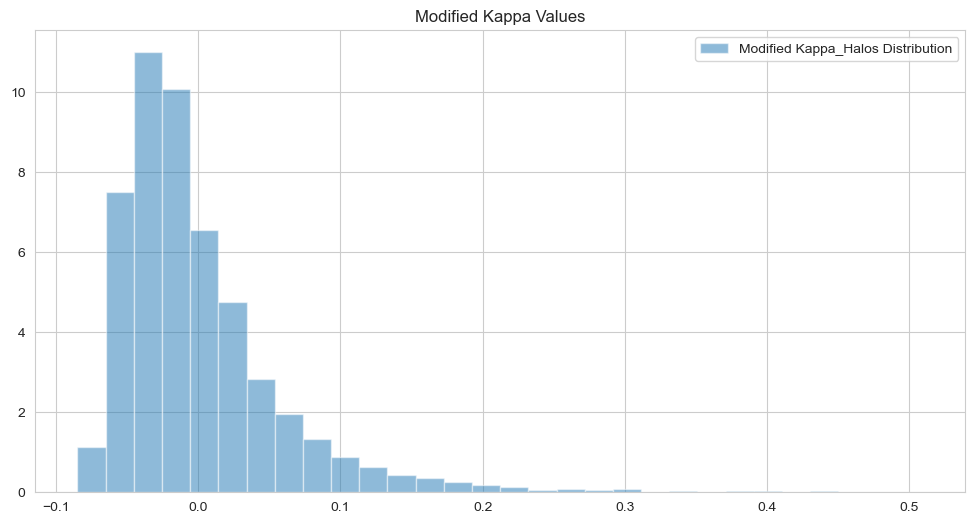

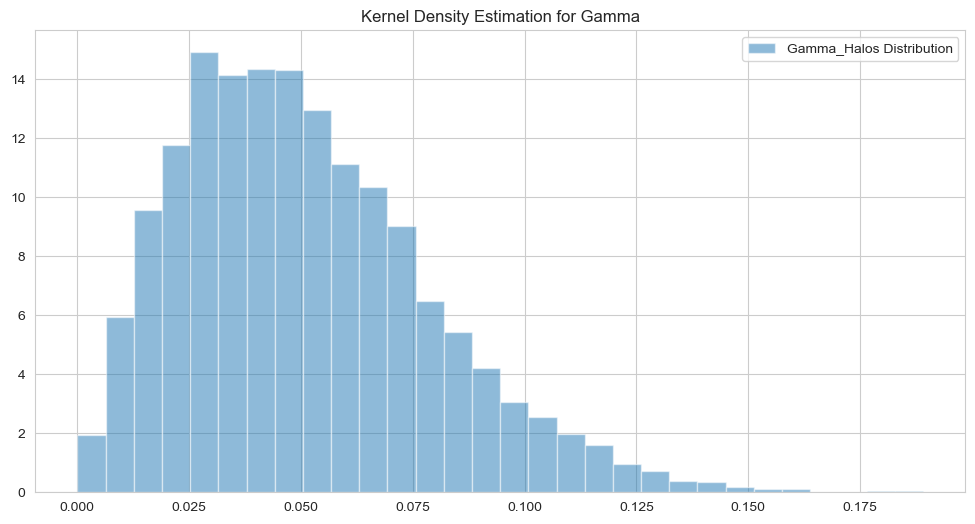

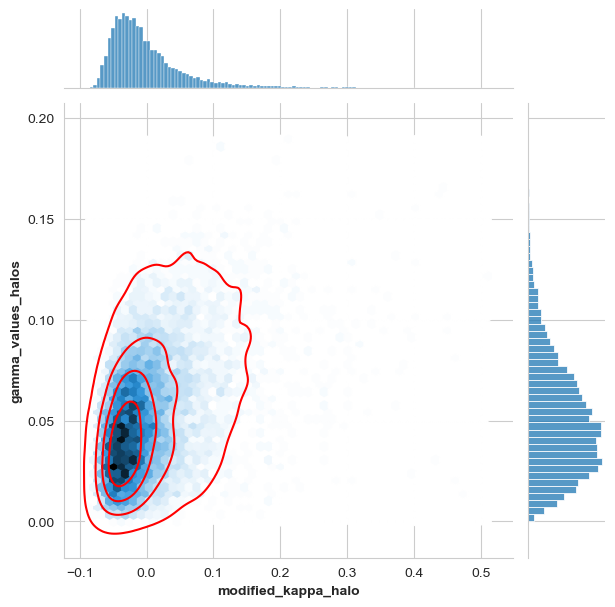

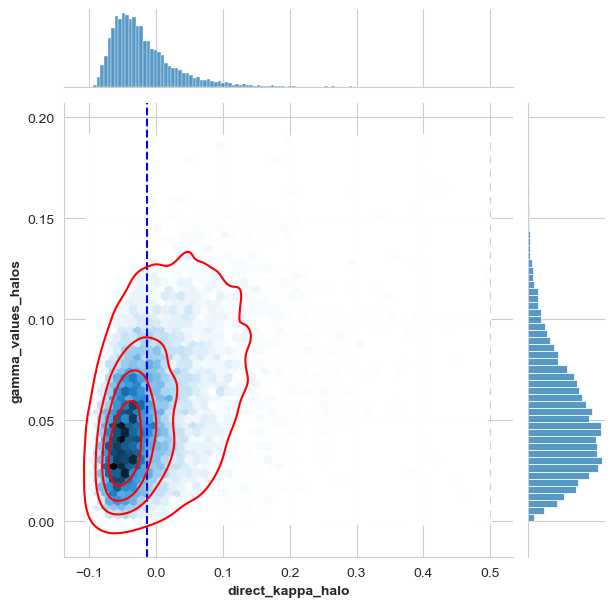

Spearman correlation coefficient:  0.37928752851687525
Kendall Tau correlation coefficient:  0.2589232923292329


In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

import seaborn as sns
modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

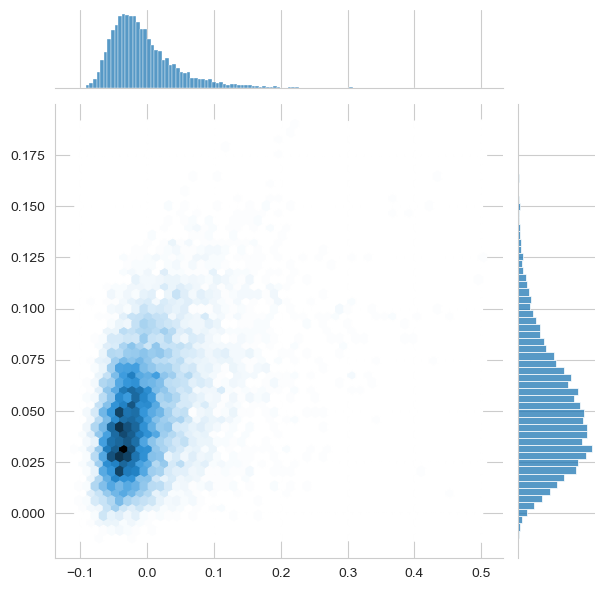

In [14]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [15]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings

nk,ng = run_halos_without_kde(n_iterations=20, sky_area=0.0001, samples_number=10,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),                                         m_min=None, m_max=None, z_max=None)


The 20 halo-lists took 159.77050757408142 seconds to run


Visualization of ` run_halos_without_kde()`

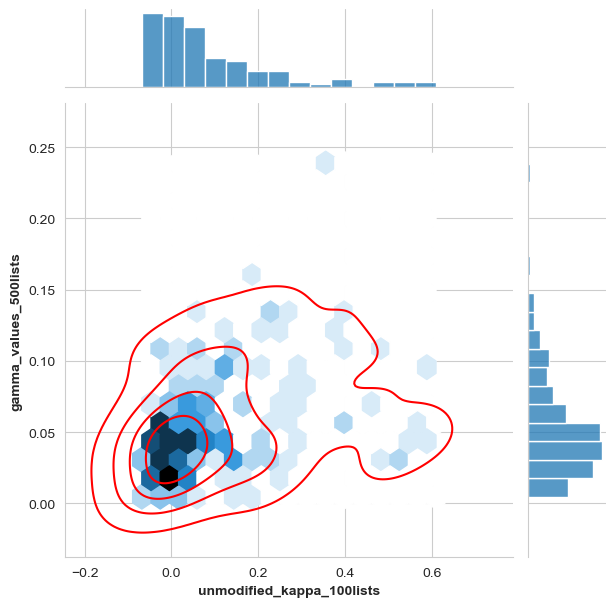

Spearman correlation coefficient:  0.38910072751818797
Kendall Tau correlation coefficient:  0.26592964824120596


In [16]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_100lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_500lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])